In [15]:
# Vector
la_county_boundary = "data/vector/la_county_boundary.shp"
ca_census_tracts = "data/vector/ca_census_tracts.shp"

# Table
ca_census_table = "data/table/ca_census_table.csv"

# Raster
ca_whp = "data/raster/ca_whp.tif"

In [16]:
import geopandas as gpd

la_county_boundary_gdf = gpd.read_file(la_county_boundary)
la_county_boundary_gdf.head()

,GISJOIN,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,G0600370,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,...,31080,31084,A,1.051349e+10,1.787502e+09,+34.1963983,-118.2618616,863553.138118,1.058205e+10,"MULTIPOLYGON (((-118.42613 32.79983, -118.4261..."


In [17]:
statefp = la_county_boundary_gdf.loc[0, 'STATEFP']
countyfp = la_county_boundary_gdf.loc[0, 'COUNTYFP']
print(f"State FIPS: {statefp}, County FIPS: {countyfp}")

State FIPS: 06, County FIPS: 037


In [18]:
ca_census_tracts_gdf = gpd.read_file(ca_census_tracts)
ca_census_tracts_gdf.head()

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,G0600010400100,06,001,400100,06001400100,4001,Census Tract 4001,G5020,S,6945857.0,0.0,+37.8676563,-122.2318813,14242.773440,6.945853e+06,"POLYGON ((-122.21292 37.85778, -122.21296 37.8..."
1,G0600010400200,06,001,400200,06001400200,4002,Census Tract 4002,G5020,S,586560.0,0.0,+37.8481378,-122.2495916,3990.700032,5.865583e+05,"POLYGON ((-122.24191 37.85191, -122.24191 37.8..."
2,G0600010400300,06,001,400300,06001400300,4003,Census Tract 4003,G5020,S,1110840.0,0.0,+37.8405841,-122.2544782,5311.191050,1.110836e+06,"POLYGON ((-122.25081 37.83714, -122.25084 37.8..."
3,G0600010400400,06,001,400400,06001400400,4004,Census Tract 4004,G5020,S,716138.0,0.0,+37.8482840,-122.2574447,3812.082499,7.161367e+05,"POLYGON ((-122.25335 37.85383, -122.25333 37.8..."
4,G0600010400500,06,001,400500,06001400500,4005,Census Tract 4005,G5020,S,591424.0,0.0,+37.8485452,-122.2647353,3292.829056,5.914232e+05,"POLYGON ((-122.26183 37.85258, -122.2617 37.85..."


<Axes: >

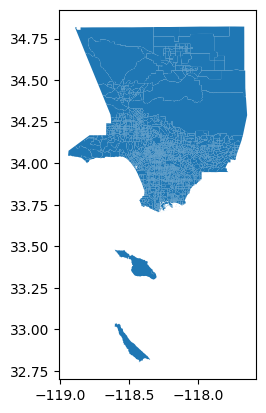

In [19]:
where_clause = (ca_census_tracts_gdf['STATEFP'] == statefp) & (ca_census_tracts_gdf['COUNTYFP'] == countyfp)
la_county_census_tracts_gdf = ca_census_tracts_gdf[where_clause]
la_county_census_tracts_gdf.plot()

In [20]:
import pandas as pd
ca_census_table_df = pd.read_csv(ca_census_table)   
ca_census_table_df.head()

,GISJOIN,YEAR,STUSAB,GEOID,GEOCODE,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,...,U7J002,U7J003,U7J004,U7J005,U7J006,U7J007,U7J008,U8R001,U8R002,U8R003
0,G0100010020100,2020,AL,1400000US01001020100,1001020100,3,6,Alabama,1,Autauga County,...,1389,213,5,8,3,35,122,40.6,39.8,42.1
1,G0100010020200,2020,AL,1400000US01001020200,1001020200,3,6,Alabama,1,Autauga County,...,842,1104,2,12,4,20,71,38.8,36.3,40.6
2,G0100010020300,2020,AL,1400000US01001020300,1001020300,3,6,Alabama,1,Autauga County,...,2244,714,12,14,6,49,177,38.8,36.8,41.0
3,G0100010020400,2020,AL,1400000US01001020400,1001020400,3,6,Alabama,1,Autauga County,...,3578,327,17,32,1,38,253,43.8,41.0,46.6
4,G0100010020501,2020,AL,1400000US01001020501,1001020501,3,6,Alabama,1,Autauga County,...,3241,632,29,93,2,58,267,40.6,38.6,42.6


In [21]:
where_clause = ca_census_table_df['COUNTY'] == 'Los Angeles County'
use_col = ['GISJOIN', 'NAME', 'U7H001']
la_county_census_table_df = ca_census_table_df[where_clause][use_col]
la_county_census_table_df = la_county_census_table_df.rename(columns={'U7H001': 'POPULATION'})
la_county_census_table_df.head()

,GISJOIN,NAME,POPULATION
5584,G0600370101110,Census Tract 1011.10,4926
5585,G0600370101122,Census Tract 1011.22,3728
5586,G0600370101220,Census Tract 1012.20,3344
5587,G0600370101221,Census Tract 1012.21,3444
5588,G0600370101222,Census Tract 1012.22,2808


In [22]:
import osmnx as ox
import os

def get_building_by_geometry(in_geometry, out_dir):
    """
    Download building footprint polygons from OpenStreetMap using a census tract geometry.
    
    Parameters:
    -----------
    in_geometry : GeoDataFrame or geometry
        The input geometry (census tract or other polygon) to query buildings within
    out_dir : str
        Output directory path to save the building footprints
    
    Returns:
    --------
    GeoDataFrame
        GeoDataFrame containing building footprints from OSM
    """
    # Create output directory if it doesn't exist
    os.makedirs(out_dir, exist_ok=True)
    
    # Download buildings from OSM within the geometry
    buildings = ox.features_from_polygon(
        in_geometry.unary_union if hasattr(in_geometry, 'unary_union') else in_geometry,
        tags={'building': True}
    )
    
    # Save to file
    output_file = os.path.join(out_dir, 'buildings.shp')
    buildings.to_file(output_file)
    
    return buildings

In [23]:
# for idx, row in la_county_census_tracts_gdf.iterrows():
#     tract_geometry = row.geometry
#     tract_id = row['GISJOIN']
#     output_dir = f'data/vector/buildings/{tract_id}'
    
#     try:
#         buildings = get_building_by_geometry(tract_geometry, output_dir)
#         print(f"Downloaded {len(buildings)} buildings for tract {tract_id}")
#     except Exception as e:
#         print(f"Error processing tract {tract_id}: {e}")

In [24]:
import leafmap

# Create a leafmap Map object
m = leafmap.Map()

# Add the LA County boundary to the map
m.add_gdf(la_county_boundary_gdf, layer_name='LA County Boundary')

# Zoom to the extent of the LA County boundary
m.zoom_to_gdf(la_county_boundary_gdf)

# Display the map
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [25]:
import rasterio

# Read the California WHP raster file
with rasterio.open(ca_whp) as src:
    ca_whp_data = src.read(1)  # Read the first band
    ca_whp_meta = src.meta
    ca_whp_transform = src.transform
    ca_whp_crs = src.crs

print(f"Raster shape: {ca_whp_data.shape}")
print(f"CRS: {ca_whp_crs}")
print(f"Metadata: {ca_whp_meta}")

Raster shape: (4484, 2629)
CRS: EPSG:5070
Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 2629, 'height': 4484, 'count': 1, 'crs': CRS.from_wkt('PROJCS["NAD83 / Conus Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5070"]]'), 'transform': Affine(270.0, 0.0, -2356155.000000001,
       0.0, -270.0, 2452814.999999998)}


In [26]:
from rasterio.mask import mask
import rasterio

# Reproject LA County boundary to match the raster CRS if needed
la_county_boundary_reprojected = la_county_boundary_gdf.to_crs(ca_whp_crs)

# Clip the California WHP raster with LA County boundary
with rasterio.open(ca_whp) as src:
    # Mask the raster with the LA County boundary geometry
    out_image, out_transform = mask(src, la_county_boundary_reprojected.geometry, crop=True)
    out_meta = src.meta.copy()
    
    # Update metadata for the clipped raster
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })

# Save the clipped raster
output_raster = "data/raster/la_county_whp.tif"
with rasterio.open(output_raster, "w", **out_meta) as dest:
    dest.write(out_image)

print(f"Clipped raster saved to {output_raster}")

Clipped raster saved to data/raster/la_county_whp.tif


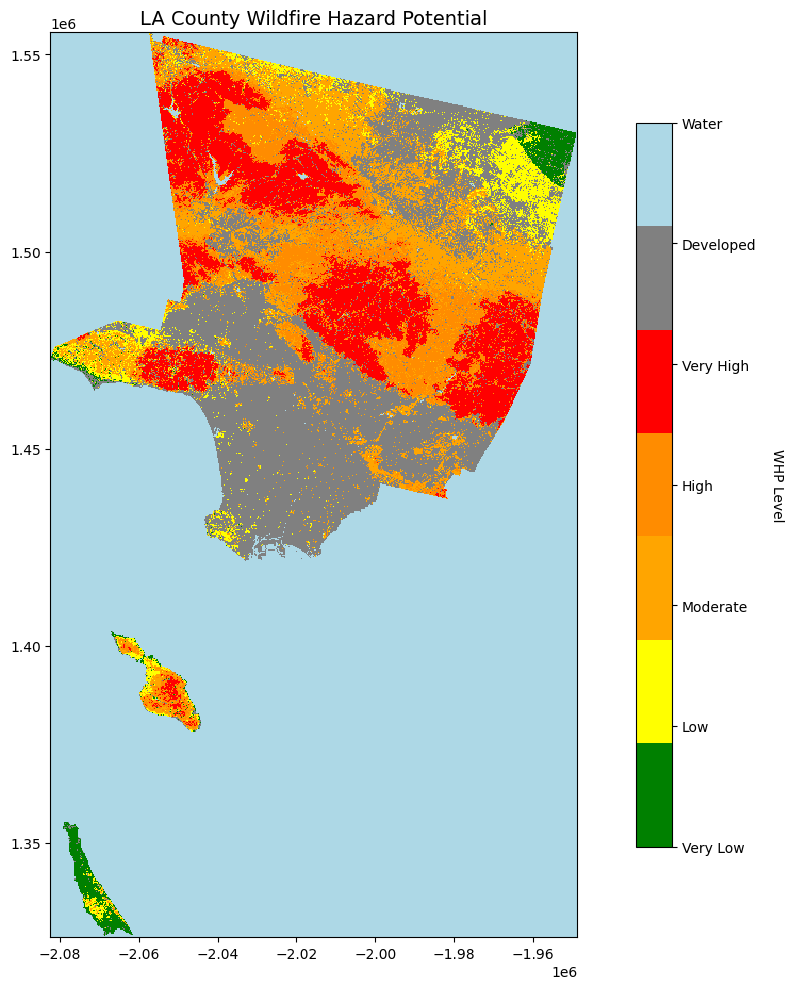

In [27]:
from rasterio.plot import show
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# Create custom colormap
# Values 1-5: green to red gradient, 6: gray (developed), 7: lightblue (water)
colors = ['green', 'yellow', 'orange', 'darkorange', 'red', 'gray', 'lightblue']
cmap = ListedColormap(colors)

# Display the clipped LA County WHP raster with custom colormap
fig, ax = plt.subplots(figsize=(12, 10))

# Use rasterio.plot.show with the clipped output
show(out_image, transform=out_transform, ax=ax, cmap=cmap, vmin=1, vmax=7, interpolation='nearest')
ax.set_title('LA County Wildfire Hazard Potential', fontsize=14)

# Add colorbar with labels
im = ax.images[0]
cbar = plt.colorbar(im, ax=ax, ticks=[1, 2, 3, 4, 5, 6, 7], shrink=0.8)
cbar.set_label('WHP Level', rotation=270, labelpad=20)
cbar.ax.set_yticklabels(['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Developed', 'Water'])

plt.tight_layout()
plt.show()


In [28]:
import xarray
# Add the LA County WHP raster to the leafmap with custom colormap
m.add_raster(output_raster, layer_name='LA County WHP', colormap=colors, vmin=1, vmax=7)
m

Map(center=[33.907641999999996, -118.166902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom…

In [29]:
la_county_census_tracts_gdf = la_county_census_tracts_gdf.merge(
    la_county_census_table_df, 
    on='GISJOIN', 
    how='left'
)
la_county_census_tracts_gdf.head()

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry,NAME_y,POPULATION
0,G0600370101110,06,037,101110,06037101110,1011.10,Census Tract 1011.10,G5020,S,1142401.0,0.0,+34.2594737,-118.2929869,4585.520052,1.142400e+06,"POLYGON ((-118.29792 34.26322, -118.29696 34.2...",Census Tract 1011.10,4926
1,G0600370101122,06,037,101122,06037101122,1011.22,Census Tract 1011.22,G5020,S,2644045.0,0.0,+34.2677213,-118.2901465,9652.233049,2.644046e+06,"POLYGON ((-118.27742 34.2599, -118.27746 34.25...",Census Tract 1011.22,3728
2,G0600370101220,06,037,101220,06037101220,1012.20,Census Tract 1012.20,G5020,S,698886.0,0.0,+34.2516083,-118.2816328,3870.684865,6.988841e+05,"POLYGON ((-118.28498 34.25589, -118.28449 34.2...",Census Tract 1012.20,3344
3,G0600370101221,06,037,101221,06037101221,1012.21,Census Tract 1012.21,G5020,S,354178.0,0.0,+34.2543290,-118.2925767,2781.494135,3.541765e+05,"POLYGON ((-118.28733 34.2559, -118.28733 34.25...",Census Tract 1012.21,3444
4,G0600370101222,06,037,101222,06037101222,1012.22,Census Tract 1012.22,G5020,S,296512.0,0.0,+34.2513519,-118.2885261,3042.743329,2.965130e+05,"POLYGON ((-118.28592 34.2559, -118.28592 34.25...",Census Tract 1012.22,2808


In [30]:
use_col = ['GISJOIN', 'STATEFP', 'COUNTYFP', 'ALAND', 'AWATER', 'POPULATION', 'geometry']
la_county_census_tracts_gdf = la_county_census_tracts_gdf[use_col]
la_county_census_tracts_gdf.head()
la_county_census_tracts_gdf.describe()

,ALAND,AWATER,POPULATION
count,2.495000e+03,2.495000e+03,2495.000000
mean,4.213824e+06,5.065915e+05,4013.630862
std,3.943304e+07,2.199778e+07,1420.536065
min,4.591400e+04,0.000000e+00,0.000000
25%,5.479160e+05,0.000000e+00,3038.000000
50%,9.505440e+05,0.000000e+00,3906.000000
75%,1.688246e+06,1.740000e+03,4887.500000
max,1.489697e+09,1.098469e+09,13527.000000


In [31]:
la_county_census_tracts_gdf['POP_KM2'] = la_county_census_tracts_gdf['POPULATION'] / (la_county_census_tracts_gdf['ALAND'] / 1e6)
la_county_census_tracts_gdf.head()

,GISJOIN,STATEFP,COUNTYFP,ALAND,AWATER,POPULATION,geometry,POP_KM2
0,G0600370101110,06,037,1142401.0,0.0,4926,"POLYGON ((-118.29792 34.26322, -118.29696 34.2...",4311.971015
1,G0600370101122,06,037,2644045.0,0.0,3728,"POLYGON ((-118.27742 34.2599, -118.27746 34.25...",1409.960874
2,G0600370101220,06,037,698886.0,0.0,3344,"POLYGON ((-118.28498 34.25589, -118.28449 34.2...",4784.757457
3,G0600370101221,06,037,354178.0,0.0,3444,"POLYGON ((-118.28733 34.2559, -118.28733 34.25...",9723.924129
4,G0600370101222,06,037,296512.0,0.0,2808,"POLYGON ((-118.28592 34.2559, -118.28592 34.25...",9470.105763
